## Metody gradientowe - metoda najszybszego spadku

### Optymalizacja jednowymiarowa - metoda złotego podziału

Do wykorzystania metody najszybszego spadku będzie nam potrzebna metoda działająca dla funkcji jednej zmiennej. Często wykorzystywaną metodą jest metoda złotego podziału.

Minimum będziemy szukać na przedziale $[x_L,x_R]$. O funkcji, którą minimalizujemy, zakładamy, że jest unimodalna na [x_L,x_R], czyli jest ciągła i ma co najwyżej jedno ekstremum lokalne.

Idea algorytmu przedstawia się następująco:

$almost\_golden\_search(fun, x_L, x_R, eps):$

1. Jeżeli $x_R-x_L<eps$, to zwróć $\frac{x_R+x_L}{2}$
2. Wybierz punkty $x_1$ oraz $x_2$ takie, że $x_L < x_1 < x_2 < x_R$
3. Jeżeli fun(x_L) < fun(x_R), to zwróć almost_golden_search(fun, x_L, x_2, eps)
4. W przeciwnym wypadku zwróć almost_golden_search(fun, x_1, x_R, eps).

Jak dobierać punkty $x_1$ oraz $x_2$? Najlepiej tak, aby $x_R-x_2=x_1-x_L$ oraz w taki sposób, aby w kolejnym kroku wykorzystywać punkt, którego poprzednio używaliśmy (czyli np. jak mamy nowy przedział $[x_L,x_2]$ to żeby wykorzystać $x_1$).

Ćw. Jeżeli tak będziemy dobierać punkt, to o jaki współczynnik będzie zmniejszał się badany przedział w każdym kroku? (Wskazówka: stąd nazwa metody)

### Zad. 1 (2 pkt)

Zaimplementuj tę metodę tak, aby nie wyliczać wielokrotnie wartości punktu z wewnątrz przedziału w kolejnym kroku i przetestuj ją na funkcji poniżej.

Sporządź też wykres zależności błędu (wartość bezwzględna) w skali logarytmicznej od ilości iteracji. Co można powiedzieć o zbieżności tej metody?

*Gdzie kryje się złota liczba w wykresie zależności błędu?


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def golden_search(fun, xL, xR, eps=1e-5):
    ## PISZ TUTAJ
    pass

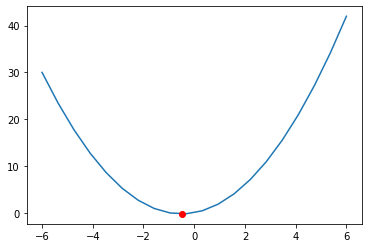

In [66]:
def fun(x):
    return x ** 2 + x

history = golden_search(fun, -5, 12, 1e-8)
x = np.linspace(-6, 6, 20)
y = fun(x)
plt.plot(x, y)
plt.plot(history[-1], fun(history[-1]), '-o', c='red')

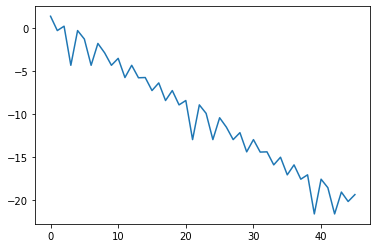

In [87]:
## PISZ TUTAJ

## Metoda najszybszego spadku
Pewną modyfikacją metody gradientu prostego jest metoda najszybszego spadku. Poszukujemy minimum różniczkowalnej funkcji $f:\mathbb{R}^n\rightarrow\mathbb{R}$. Algorytm przedstawia się następująco:
 1. Wybierz punkt startowy $x_0$, $n=0$
 2. Wyznacz nowe $x_{n+1}:=x_n-\alpha_n\nabla f(x_n)$
 3. $n:=n+1$
 4. Jeżeli $||\nabla f(x_n)||>\epsilon$ i n mniejsze od dopuszczalnej ilości iteracji, to wróć do 2.
Wygląda znajomo? Różnica w porównaniu z metodą gradientu prostego polega na tym, że wybieramy takie $\alpha_n$ w każdym kroku, aby $f(x_n-\alpha_n\nabla f(x_n))$ było jak najmniejsze ze względu na $\alpha_n$. Wykorzystujemy do tego wybraną przez siebie metodę optymalizacji kierunkowej jak np. metodę złotego podziału.

Ćw. Udowodnij, że różnice kolejnych przybliżeń minimum w metodzie największego spadku są względem siebie ortogonalne. (Czyli, że $x_{n+2}-x_{n+1}$ jest ortogonalny do $x_{n+1}-x_n$)

### Zadanie 2 (2pkt)
Twoim zadaniem jest wykorzystać metodę największego spadku, aby zminimalizować no_so_secret_function. Do liczenia pochodnej wykorzystaj automatyczne różniczkowanie (znane z metod numerycznych), a konkretnie bibliotekę autograd: [https://github.com/HIPS/autograd](https://github.com/HIPS/autograd). Gdy funkcja jest dana jawnym wzorem w numpy'u możemy wyliczyć dokładną pochodną razem z wartością funkcji. Następnie sporządź wykres, na którym zaznaczysz kolejne iteracje algorytmu. (Przykładowy wykres uzyskano za pomocą funkcji contourf i scatter z pakietu matplotlib)

In [146]:
from autograd import numpy as np
from autograd import grad

def not_so_secret_function(x):
    return -np.sin(1 / 2 * x[0] ** 2 - 1 / 4 * x[1] ** 2 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))

In [276]:
def steepest_descent(fun, grad, initial_x, eps=1e-5, maxiter=1000):
    # PISZ TUTAJ
    pass

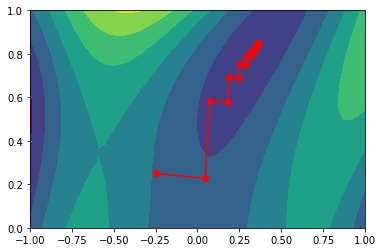

In [164]:
## PISZ TUTAJ

### Zadanie 3 - Regresja logistyczna (3 pkt)
Wykorzystaj wygenerowane punkty (w komórce poniżej), aby dokonać regresji logistycznej. Zadanie jest posobne do tego z poprzednich zajęć, lecz zamiast dopasowywać funkcję liniową $ax+b$ będziemy dopasowywać funkcję logistyczną:
$$
f(x,y)=\frac{1}{1+e^{-(ax+bx+c)}}
$$
Ta funkcja przyjmuje wartości z przedziału $(0,1)$, gdzie a,b,c są szukanymi parametrami. Im bliżej wartości 1 zwróci funkcja, tym większe prawdopodobieństwo, że nasz obiekt o parametrach (x,y) należy do klasy 1. Błąd modelu można wyznaczyć jako błąd średniokwadratowy:
$$
E = \sum_i (f(x_i,y_i)-z_i)^2
$$
gdzie $(x_i,y_i,z_i)$, to parametry i-tego obiektu, gdzie $z_i$ jest wartością 0 lub 1 w zależności, do której klasy należy obiekt.
Opcjonalnie można wykorzystać też funkcję kosztu:
$$
E = \sum_i - z_i\log(f(x_i,y_i))) - (1-z_i)\log(1-f(x_i,y_i))
$$

W ten sposób stworzymy klasyfikator, który dla punktów o parametrach (x,y) przyporządkuje go do klasy 1, gdy $f(x,y)>0.5$, a do klasy 0 w przeciwnym wypadku.

Wykorzystaj automatyczne różniczkowanie i metodę największego spadku.

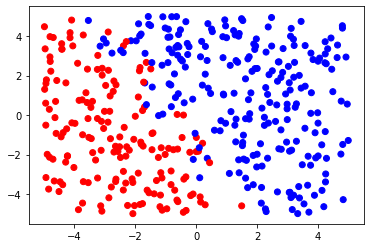

In [346]:
inputs = []
targets = []
while len(inputs) < 400:
    a = -5
    b = 5
    x = (b-a) * np.random.random () + a
    y = (b-a) * np.random.random () + a
    inputs.append([x,y])
    if 0.5 < -2*x-y < 3:
        targets.append(np.random.choice([True,False]))
    elif -2*x-y < 3:
        targets.append(True)
    elif -2*x-y > 0.5:
        targets.append(False)

inputs = np.array(inputs)
targets = np.array(targets)

colours = np.full(inputs.shape[0], 'r')
colours[targets] = 'b'
plt.scatter(inputs[:,0], inputs[:,1], c=colours)

Błąd początkowy: 100.0
Błąd końcowy: 13.659750127598441


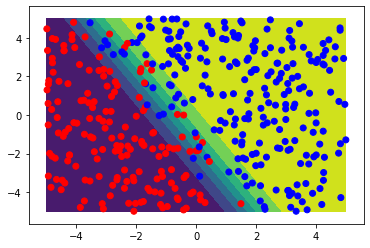

In [355]:
## PISZ TUTAJ